In [1]:
import numpy as np, matplotlib.pyplot as plt, pandas as pd, seaborn as sns

import sys
sys.path.append('/ahg/regevdata/projects/CRISPR-libraries/prj2/evolution/badran/src/')
import _config

sys.path.append('/home/unix/maxwshen/')
from mylib import util

notebook_nm = 'fig_skew'
results_dir = _config.RESULTS_PLACE + f'{notebook_nm}/'
util.ensure_dir_exists(results_dir)

Using data folder:
 /ahg/regevdata/projects/CRISPR-libraries/prj2/evolution/badran/data/


In [2]:
def centered_skew(x):
    x = np.array(x)
    return np.mean((x - np.mean(x))**3)

def normalized_skew(x):
    x = np.array(x)
    return np.mean((x - np.mean(x))**3) / (np.std(x)**3)

def norm(x, lp = 2):
    x = np.array(x)
    return (np.sum(x**lp))**(1/lp)

def custom_score(x):
    x = np.array(x)
    nx = 1 - x
    return np.mean(nx**2)

In [3]:
res = 0.01

from collections import defaultdict
dd = defaultdict(list)
for i in np.arange(0, 1 + res, res):
    for j in np.arange(0, 1 - i + res, res):
        k = 1 - i - j
        vec = [i, j, k]
        
        dd['x'].append(i)
        dd['y'].append(j)
        dd['z'].append(k)
        dd['Unnormalized skew'].append(centered_skew(vec))
        dd['Skew'].append(normalized_skew(vec))
        dd['L1 norm'].append(norm(vec, lp = 1))
        dd['L2 norm'].append(norm(vec, lp = 2))
        dd['L3 norm'].append(norm(vec, lp = 3))
        dd['Variance'].append(np.var(vec))
        dd['Custom score'].append(custom_score(vec))

df = pd.DataFrame(dd)

# Add color

# max_skew = max(df['Skew'])
# num_steps = 100
# palette = sns.color_palette('hls', num_steps)

# dd = defaultdict(list)
# for idx, row in df.iterrows():
#     color = palette[int((row['Skew'] / max_skew) * num_steps) - 1]
#     dd['Color'].append(color)
    
# df['Color'] = dd['Color']

In [4]:
df.head()

,x,y,z,Unnormalized skew,Skew,L1 norm,L2 norm,L3 norm,Variance,Custom score
0,0.0,0.00,1.00,0.074074,0.707107,1.0,1.000000,1.000000,0.222222,0.666667
1,0.0,0.01,0.99,0.070774,0.706861,1.0,0.990051,0.990000,0.215622,0.660067
2,0.0,0.02,0.98,0.067541,0.706093,1.0,0.980204,0.980003,0.209156,0.653600
3,0.0,0.03,0.97,0.064374,0.704754,1.0,0.970464,0.970010,0.202822,0.647267
4,0.0,0.04,0.96,0.061274,0.702794,1.0,0.960833,0.960023,0.196622,0.641067


In [5]:
len(df)

5167

## 3d simplex plot

Saving to /ahg/regevdata/projects/CRISPR-libraries/prj2/evolution/badran/results/fig_skew/Unnormalized_skew.pdf ...


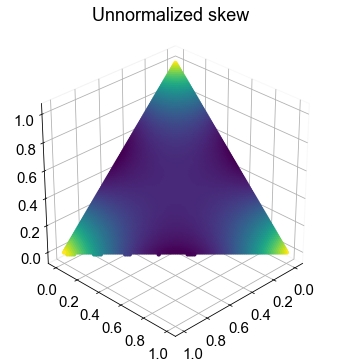

In [6]:
def plot(skew_nm = 'Unnormalized skew'):

    #
    import matplotlib
    matplotlib.rc('font', family = 'Arial', size = 15)
    matplotlib.rcParams['mathtext.fontset'] = 'custom'
    matplotlib.rcParams['mathtext.it'] = 'Arial:italic'
    #
    import matplotlib.pyplot as plt
    from mpl_toolkits.mplot3d import Axes3D

    fig = plt.figure(figsize = (5, 5))
    ax = fig.add_subplot(111, projection='3d')

    # num_colors = 100
    # color_res = max(df[skew_nm]) / num_colors
    # palette = sns.hls_palette(n_colors = num_colors, s = 0.95, l = 0.65)
    # palette = sns.color_palette('BuGn_r', num_colors)
    # colors = [palette[int(s // color_res)] for s in df[skew_nm]]

    ax.scatter(
        df['x'],
        df['y'],
        df['z'],
        c = df[skew_nm],
        linewidths = 0,
        marker = 'o',
        # color = colors,
        alpha = 1,
    )
    sns.despine(trim = False)
    plt.tight_layout()
    plt.title(skew_nm)

    ax.view_init(30, 45)
    ax.xaxis.pane.fill = False
    ax.yaxis.pane.fill = False
    ax.zaxis.pane.fill = False

    ##

    ax.tick_params(length = 4.5, color = 'black', width = 1.5)
    # for axis in ['bottom', 'left']:
    #     ax.spines[axis].set_linewidth(1.5)
    #     ax.spines[axis].set_color('black')

    matplotlib.rcParams['pdf.fonttype'] = 42
    matplotlib.rcParams['ps.fonttype'] = 42

    out_fn = results_dir + f'{skew_nm.replace(" ", "_")}.pdf'
    print(f'Saving to {out_fn} ...')
    plt.savefig(out_fn, transparent = True, bbox_inches = 'tight')

    plt.show()
    plt.close()
    ##
    
plot('Unnormalized skew')

Saving to /ahg/regevdata/projects/CRISPR-libraries/prj2/evolution/badran/results/fig_skew/Skew.pdf ...


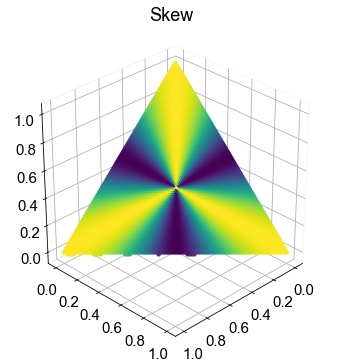

Saving to /ahg/regevdata/projects/CRISPR-libraries/prj2/evolution/badran/results/fig_skew/L2_norm.pdf ...


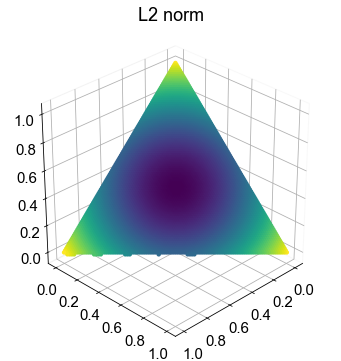

Saving to /ahg/regevdata/projects/CRISPR-libraries/prj2/evolution/badran/results/fig_skew/L3_norm.pdf ...


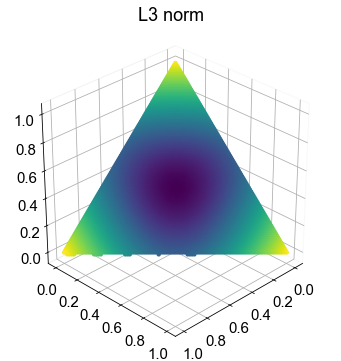

Saving to /ahg/regevdata/projects/CRISPR-libraries/prj2/evolution/badran/results/fig_skew/Variance.pdf ...


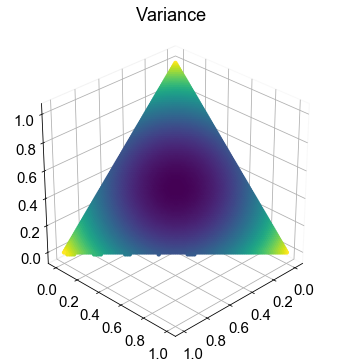

In [7]:
skews = [
    'Skew',
    'L2 norm',
    'L3 norm',
    'Variance',
]

for skew in skews:
    plot(skew)

## legend cbar

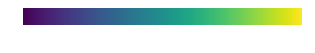

In [55]:
gradient = np.linspace(0, 1, 256)
gradient = np.vstack((gradient, gradient))

fig, ax = plt.subplots(figsize = (5, 0.3))

ax.imshow(gradient, aspect='auto', cmap = plt.get_cmap('viridis'))
ax.set_axis_off()

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
plt.savefig(results_dir + f'viridis_cmap.pdf', transparent = True, bbox_inches = 'tight')

plt.show()
plt.close()